# Procesamiento de imágenes · Tarea 3

En esta tarea nos enfocaremos en el procesamiento de imágenes en el espacio HSV. Ecualizaremos una foto y le haremos unos cambios interesantes a los colores. Lograremos hacer algo así:

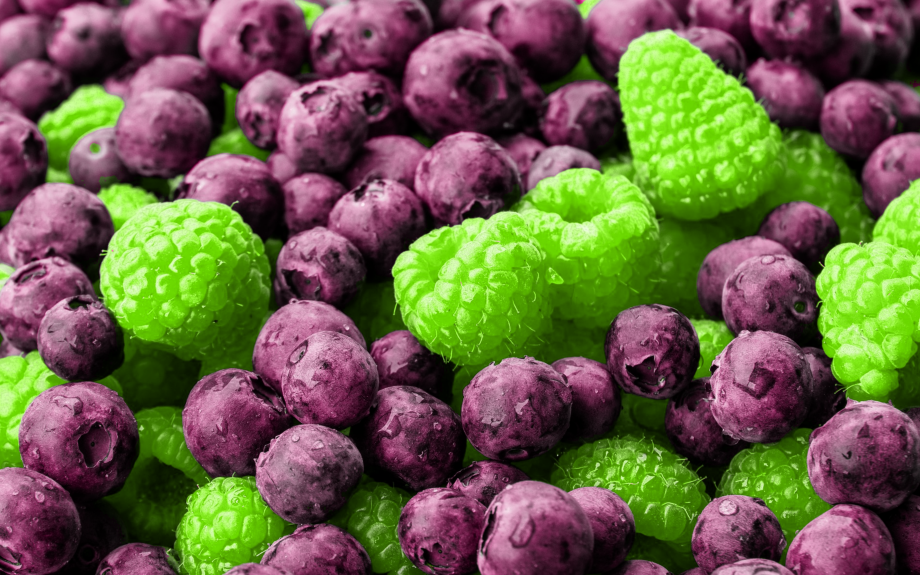

El programa está incompleto, por lo que deberás escribir tu propio código en las celdas que lo soliciten. Ejecuta las celdas en orden hasta llegar a una que debas rellenar. Una vez hayas escrito tu código, continúa ejecutando las celdas y asegúrate que no hayan alertas al correr los chequeos.

### Importante
* Lee atentamente las instrucciones y todo el código.
* Ejecuta las celdas en orden.
* Escribe tu código en las celdas que lo soliciten.
* Usa los nombres de variables que te pidan.
* Confirma que tu código esté correcto corriendo las celdas que dicen "Chequeo".
* Si el chequeo alerta que hay alguna variable incorrecta, vuelve atrás y arréglala. No hay penalización por esto.

## Configuración inicial

##### Importamos librerías

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import checker
import importlib

##### Aumentamos el tamaño de las imágenes

In [2]:
plt.rcParams['figure.dpi'] = 200

## Carga y visualización de la imagen

### Orden de los canales en OpenCV

En clases vimos que una forma de representar una imagen a color es con una matriz bidimensional para cada canal (rojo, verde y azul).

Las imágenes cargadas con OpenCV contienen estos tres canales, pero en el orden contrario: **Blue Green Red (BGR) en vez de Red Green Blue (RGB)**. Debemos tomar esto en cuenta al visualizarlas o manipularlas. Al visualizar las imágenes con Matplotlib usaremos ```img[:, :, ::-1]``` para invertir el orden. Existen más formas de lograr lo mismo, como ```cv2.cvtColor(img, cv2.COLOR_BGR2RGB)```. Esta última función también nos servirá para ir y volver del espacio HSV.

##### Cargamos la foto  a color

In [3]:
img_path = 'berries.png'
img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)

##### Mostramos la foto a color junto con información sobre ella 

Las dimensiones de la imagen son (1210, 1920, 3)


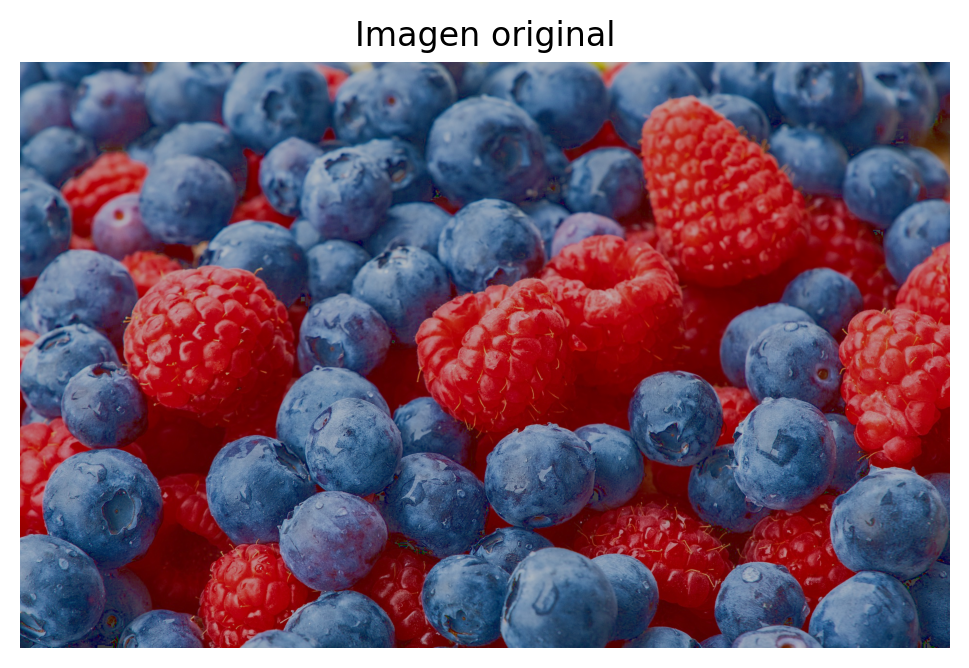

In [4]:
print(f'Las dimensiones de la imagen son {img_bgr.shape}')

# Incluimos el [:, :, ::-1] para convertir la imagen de BGR a RGB
plt.imshow(img_bgr[:, :, ::-1])
plt.title('Imagen original')
plt.axis('off');

## Ecualización

Tenemos una imagen de unas sabrosas frambuesas y arándanos, pero esta no se ve muy bien. Pareciera tener **bajo contraste**.

¡Intentemos mejorarla!

### Ecualización en RGB

En clases vimos que ecualizar una imagen en escala de grises podía mejorarla considerablemente. Veamos qué pasa si intentamos lo mismo con una imagen a color, ecualizando cada uno de los tres canales RGB.

In [5]:
img_bgr_eq_bad = img_bgr.copy()

# Canal azul
img_bgr_eq_bad[:, :, 0] = cv2.equalizeHist(img_bgr_eq_bad[:, :, 0])

# Canal verde
img_bgr_eq_bad[:, :, 1] = cv2.equalizeHist(img_bgr_eq_bad[:, :, 1])

# Canal rojo
img_bgr_eq_bad[:, :, 2] = cv2.equalizeHist(img_bgr_eq_bad[:, :, 2])

Veamos el resultado de la ecualización en el espacio RGB.

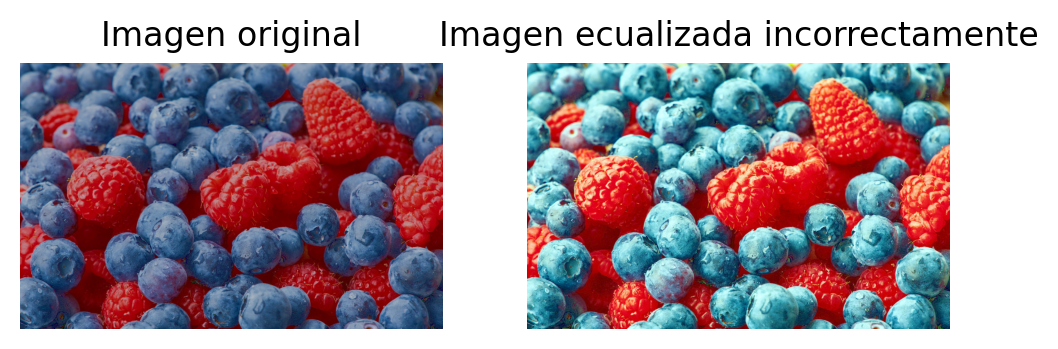

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bgr_eq_bad, cv2.COLOR_BGR2RGB))
plt.title('Imagen ecualizada incorrectamente')
plt.axis('off');

La nueva imagen pareciera tener más contraste, pero también cambiaron los colores de las frutas. Pasamos de tener *blueberries* a tener *cyanberries*.

Ecualizar en RGB no anduvo bien. Probemos ecualizando en el espacio HSV.

### Ecualización en HSV

Antes de hacer la ecualización en este espacio estudiaremos el histograma para ver si efectivamente hay algo que mejorar por ahí.

#### RGB a HSV

En la siguiente celda debes **convertir ```img_bgr``` del espacio BGR al HSV** y almacenarla en ```img_hsv```.

Arriba usamos una función de OpenCV para pasar de BGR a RGB. Usa la misma para lograr este objetivo, cambiando el segundo parámetro al que corresponda. El nombre del nuevo parámetro es bastante intuitivo, pero si necesitas ayuda puedes encontrar una lista con las conversiones disponibles [aquí](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html). Los valores del canal _hue_ de ```img_hsv``` deben estar entre 0 y 179, no entre 0 y 255.

In [7]:
# Define img_hsv
# Escribe tu código en las siguientes líneas
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

##### Chequeo

In [8]:
importlib.reload(checker)
assert checker.check_img_hsv(img_hsv)

Imagen correcta. ¡Puedes seguir adelante!


### Histograma del canal *value*

A partir de este canal podremos estudiar la intensidad de los pixeles de la imagen.

Tomemos el tercer canal de ```img_hsv``` y grafiquemos su histograma.

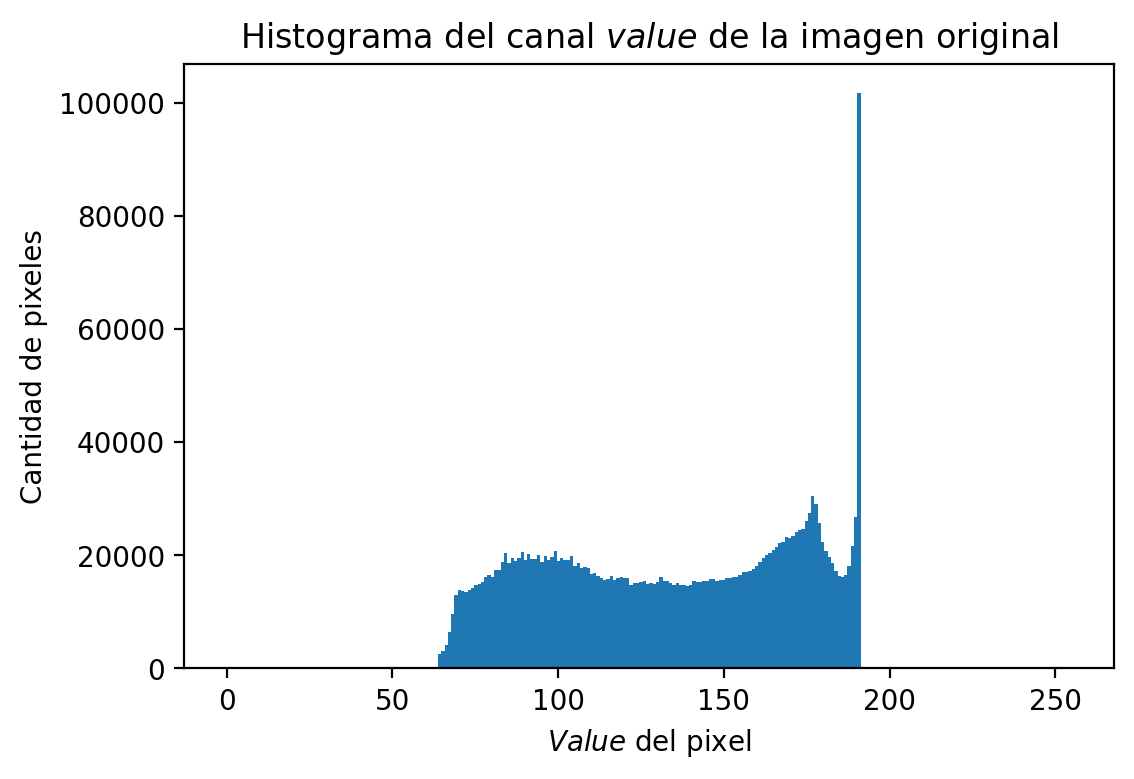

In [10]:
plt.hist(img_hsv[:, :, 2].ravel(), 256, range=(0, 255))
plt.title('Histograma del canal $\it{value}$ de la imagen original')
plt.xlabel('$\it{Value}$ del pixel')
plt.ylabel('Cantidad de pixeles');

### Ecualización del canal _value_

El histograma anterior nos muestra que el canal *value* está concentrado al centro y no ocupa una gran parte del rango entre 0 y 255, lo que genera que veamos una imagen con bajo contraste.

Usemos OpenCV para ecualizar este canal y mejorar nuestra imagen.

**Crea una copia de ```img_hsv``` en ```img_hsv_eq```**. No basta con hacer ```img_hsv_eq = img_hsv```, ya que solo estaríamos referenciando la variable. Usa el método ```copy()``` de Numpy. Luego,  **ecualiza el canal *value* de ```img_hsv_eq```**, almacenando la imagen ecualizada en la misma imagen. Ya vimos cómo ecualizar un canal más arriba.

In [11]:
# Define img_hsv_eq
# Escribe tu código en las siguientes líneas
img_hsv_eq = img_hsv.copy()
img_hsv_eq[:, :, 2] = cv2.equalizeHist(img_hsv_eq[:, :, 2])

##### Chequeo

In [12]:
importlib.reload(checker)
assert checker.check_img_hsv_eq(img_hsv_eq)

Imagen correcta. ¡Puedes seguir adelante!


Grafiquemos el nuevo histograma del canal *value*.

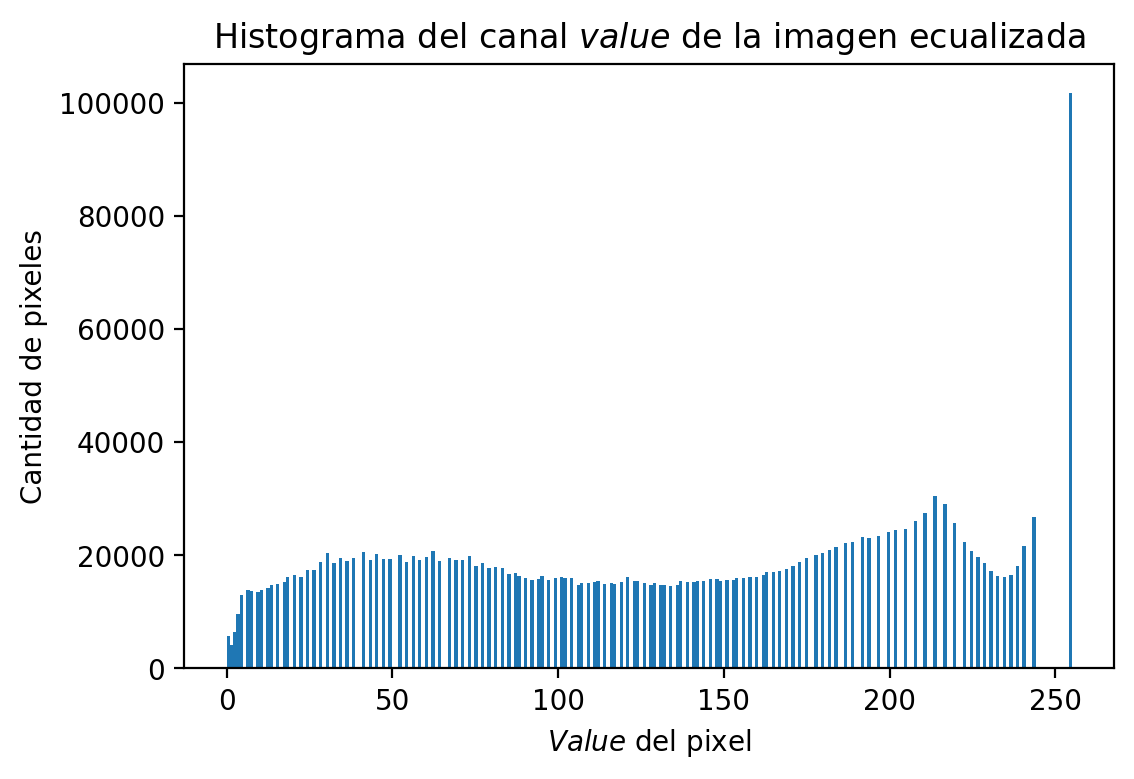

In [14]:
plt.hist(img_hsv_eq[:, :, 2].ravel(), 256, range=(0, 255))
plt.title('Histograma del canal $\it{value}$ de la imagen ecualizada')
plt.xlabel('$\it{Value}$ del pixel')
plt.ylabel('Cantidad de pixeles');

¡Mucho mejor! Logramos que la intensidad de los pixeles ocuparan todo el rango posible entre 0 y 255. Se aprecia claramente que están más espaciados.

Ahora viene el momento de la verdad. Veamos si mejoró la imagen.

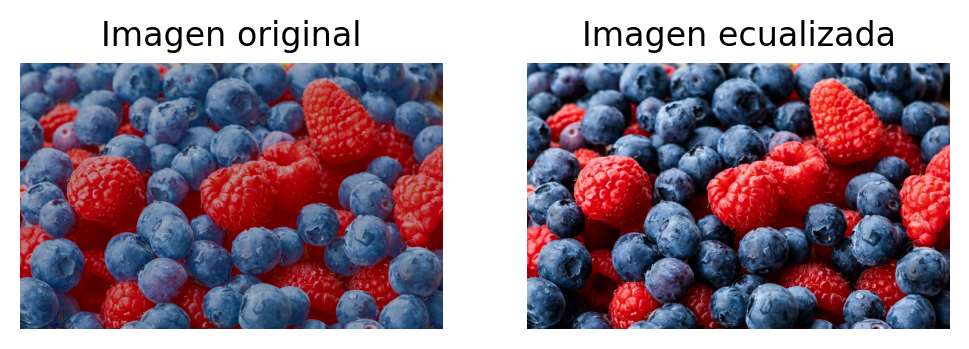

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB))
plt.title('Imagen ecualizada')
plt.axis('off');

¡Increíble! Logramos mejorar la imagen, aumentando su contraste sin alterar los colores de las frutas.

## Jugando con el _hue_

Tenemos una maravillosa imagen y conocimientos sobre el espacio HSV. Usemos estas herramientas para jugar con el *hue*.

A continuación se muestra una ilustración con los ángulos que corresponden a cada *hue*.

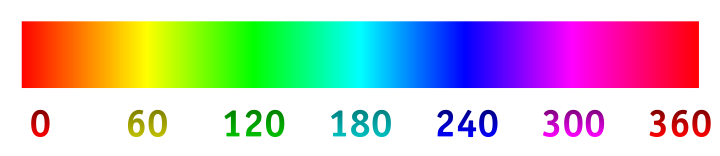
_Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Hue)_

Vemos que el rango va entre 0º y 360º. La conversión ```BGR2HSV``` de OpenCV resulta en un canal *hue* entre 0 y 179, por lo que los valores en nuestro código serán la mitad de los valores en la imagen. Por ejemplo, como el verde corresponde a 120º en la imagen, en el código será 60.

Estudiemos el histograma del *hue* de nuestra imagen.

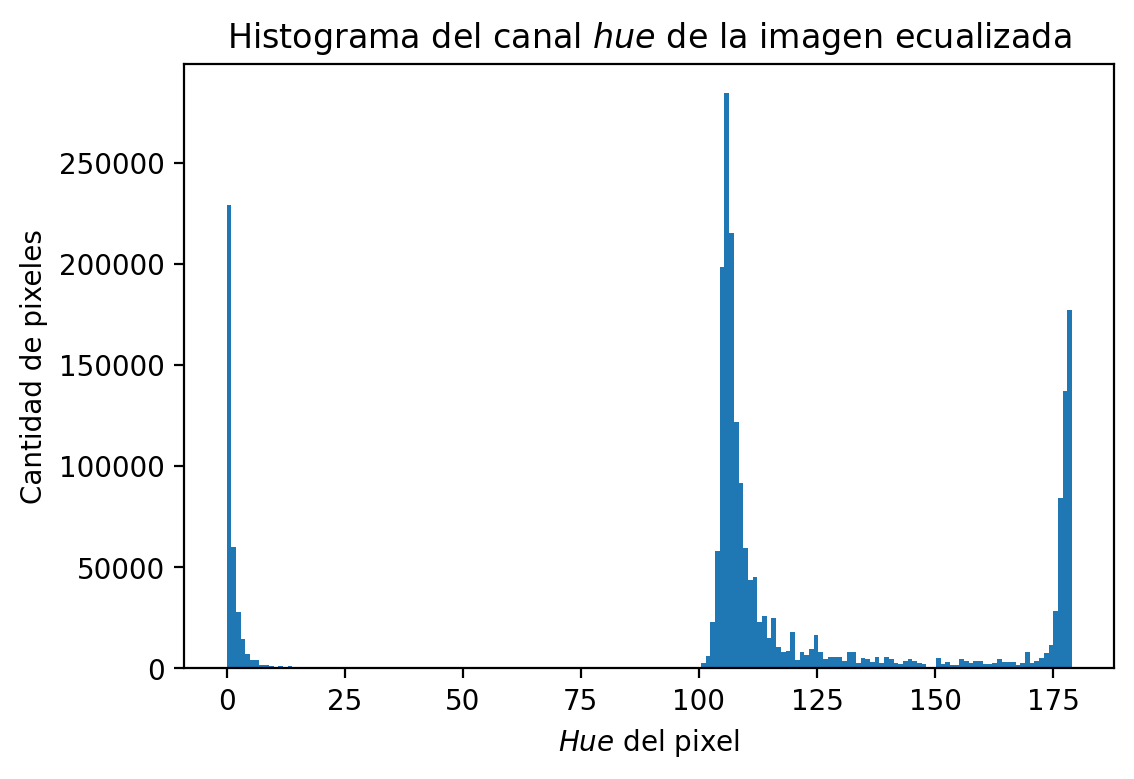

In [16]:
plt.hist(img_hsv_eq[:, :, 0].ravel(), 180, range=(0, 179))
plt.title('Histograma del canal $\it{hue}$ de la imagen ecualizada')
plt.xlabel('$\it{Hue}$ del pixel')
plt.ylabel('Cantidad de pixeles');

Vemos tres grandes *peaks* en el histograma.

* El más grande está cerca de 107, lo que corresponde a un _hue_ de 214º en nuestra imagen. Este valor representa un azul claro, el color de los arándanos. 
* Los otros *peaks* están cerca de 0 y 179, pero como el _hue_ es cíclico, corresponden al mismo *peak*. Estos valores representan el rojo, el color de las frambuesas.

### Resaltando colores específicos

Hay fotos que se han editado para que solo conserven uno o dos colores, como la que se muestra a continuación:

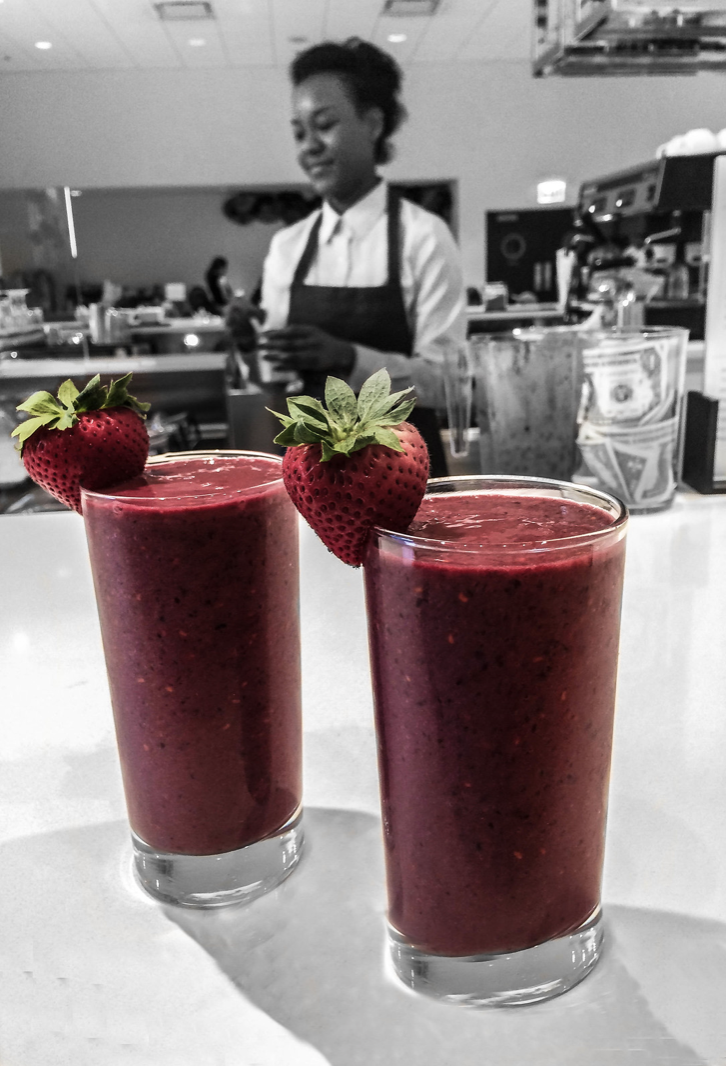

Este efecto le da un toque asombroso. ¡Hagámoslo con nuestra foto!

**Copia ```img_hsv_eq``` en ```img_hsv_red```** usando la función de Numpy que ya conocemos. Luego, **extrae de ```img_hsv_red``` los canales _hue_ y _saturation_**, almacenándolos en variables con el nombre que desees. Queremos mantener solo el rojo de la foto, por lo que nos quedaremos con los _hue_ entre 330º y 30º, equivalentes a 165 y 15 en el código (incluyendo estos valores extremos). **Modifica cada pixel cuyo _hue_ no esté en ese rango**, es decir, esté entre 15 y 165 (no incluyendo el 15 y el 165), **fijando su saturación en cero**. Esto último se puede lograr iterando sobre cada pixel, pero resulta más eficiente y veloz aprovechar las funcionalidades de Numpy. Te puede resultar útil [esta](https://www.geeksforgeeks.org/replace-numpy-array-elements-that-doesnt-satisfy-the-given-condition/) y [esta](https://stackoverflow.com/questions/16343752/numpy-where-function-multiple-conditions) página. La imagen modificada debe quedar almacenada en ```img_hsv_red```.

In [41]:
# Define img_hsv_red
# Escribe tu código en las siguientes líneas
img_hsv_red = img_hsv_eq.copy()
hue = img_hsv_red[:, :, 0]
saturation = img_hsv_red[:, :, 1]
saturation[(hue > 15) & (hue < 165)] = 0
img_hsv_red[:, :, 1] = saturation
img_hsv_red[:, :, 0] = hue

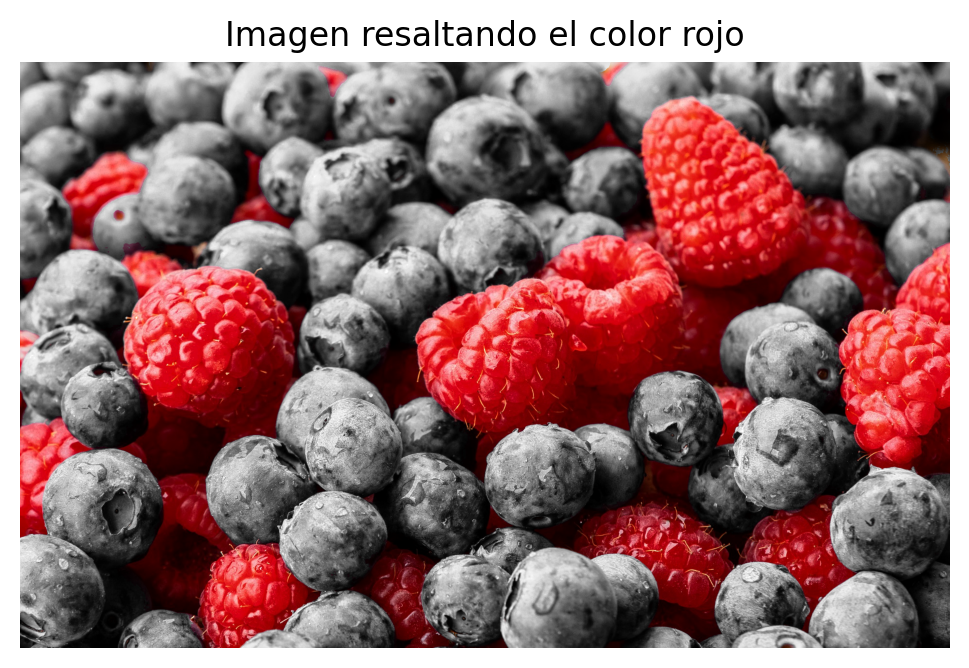

In [42]:
plt.imshow(cv2.cvtColor(img_hsv_red, cv2.COLOR_HSV2RGB))
plt.title('Imagen resaltando el color rojo')
plt.axis('off');

##### Chequeo

In [43]:
importlib.reload(checker)
assert checker.check_img_hsv_red(img_hsv_red)

Imagen correcta. ¡Puedes seguir adelante!


¡Fantástico! Logramos convertir los arándanos a escala de grises manteniendo el color de las frambuesas.

## Reemplazando colores por otros

En el ejercicio anterior usamos el _hue_ de cada pixel para determinar si llevar su saturación a cero. Ahora no solo usaremos el _hue_ como condición, sino que también lo modificaremos. Cambiemos el color de las frambuesas a naranjo y el de los arándanos a magenta.

El rango de _hue_ definido en el ejercicio anterior permitió aislar las frambuesas. Como el resto de los pixeles corresponden a los arándanos, seleccionemos todo el rango restante para cambiar el color de los arándanos.

Estudiando la imagen de los *hue*, vemos que el naranjo corresponde a 30º (15 en el código) y el magenta a 300º (150 en el código).

**Copia ```img_hsv_eq``` en ```img_hsv_rep```** usando la función de Numpy que ya conocemos. Luego, **extrae de ```img_hsv_rep``` el canal _hue_** y almacénalo en una variable con el nombre que desees. **Cambia a 150 el _hue_ de todo pixel cuyo _hue_ sea mayor a 15 y menor que 165 (no rojo). Luego, cambia a 15 el _hue_ de todo pixel cuyo _hue_ sea menor igual que 15 o mayor igual que 165 (rojo).** La imagen modificada debe quedar almacenada en ```img_hsv_rep```.

In [46]:
# Define img_hsv_rep
# Escribe tu código en las siguientes líneas
img_hsv_rep = img_hsv_eq.copy()
hue = img_hsv_rep[:, :, 0]
hue[(hue > 15) & (hue < 165)] = 150
hue[(hue <= 15) | (hue >= 165)] = 15
img_hsv_rep[:, :, 0] = hue

img_hsv_rep_hue = img_hsv_rep[:, :, 0]

Revisemos el histograma del canal _hue_ de ```img_hsv_rep``` para ver si hicimos todo bien.

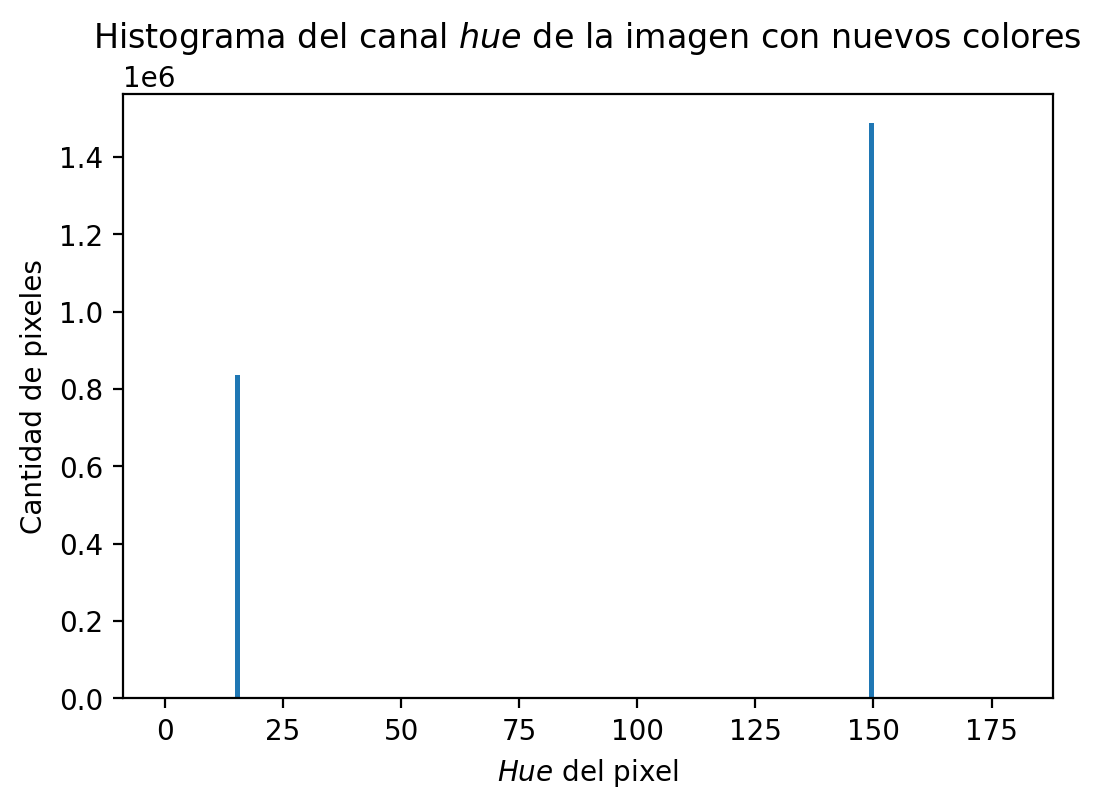

In [48]:
plt.hist(img_hsv_rep_hue.ravel(), 180, range=(0, 179))
plt.title('Histograma del canal $\it{hue}$ de la imagen con nuevos colores', y=1.05)
plt.xlabel('$\it{Hue}$ del pixel')
plt.ylabel('Cantidad de pixeles');

Debería haber un _peak_ en 15 y otro en 150. Como más pixeles corresponden a los arándanos, ese último _peak_ es más grande.

¡Veamos el resultado final!

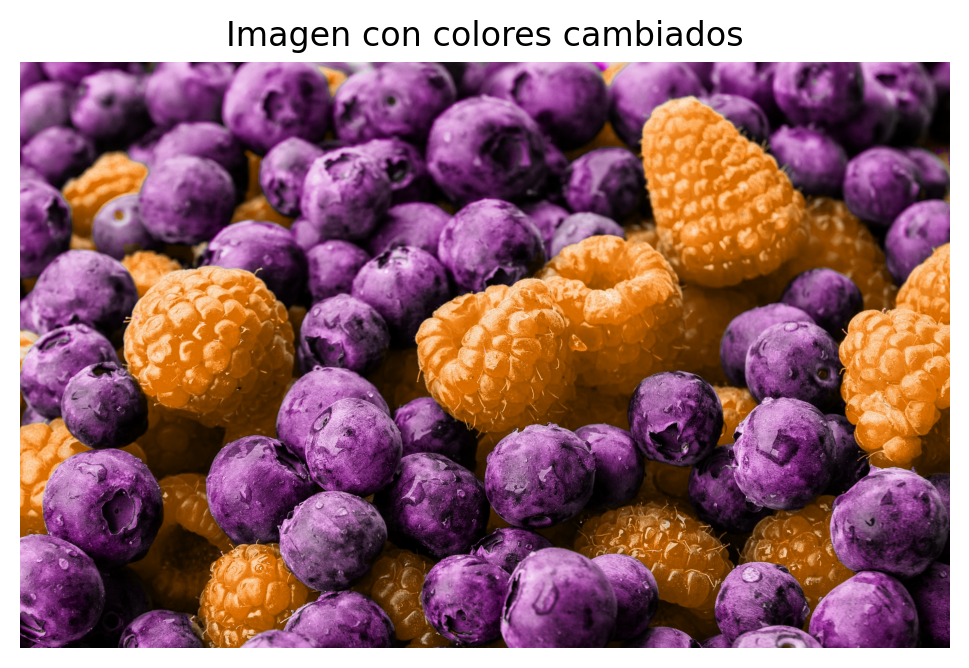

In [50]:
plt.imshow(cv2.cvtColor(img_hsv_rep, cv2.COLOR_HSV2RGB))
plt.title('Imagen con colores cambiados')
plt.axis('off');

##### Chequeo

In [51]:
importlib.reload(checker)
assert checker.check_img_hsv_rep(img_hsv_rep)

Imagen correcta. ¡Puedes seguir adelante!


Lograste cambiar el color de las frutas, creando _orangeberries_ y _magentaberries_. ¡Felicitaciones!

## Chequeo final

La siguiente función revisará si los valores están correctos corriendo los mismos chequeos que antes.

Recuerda presionar _Validate_ arriba para que la plataforma corra todos los tests.

In [52]:
importlib.reload(checker)
assert checker.check_all(img_hsv, img_hsv_eq, img_hsv_red, img_hsv_rep)

Chequeando img_hsv
Imagen correcta. ¡Puedes seguir adelante!
Chequeando img_hsv_eq
Imagen correcta. ¡Puedes seguir adelante!
Chequeando img_hsv_red
Imagen correcta. ¡Puedes seguir adelante!
Chequeando img_hsv_rep
Imagen correcta. ¡Puedes seguir adelante!

¡Felicitaciones! ¡Lograste completar el programa!
